# **Airline Fare forecasting System**
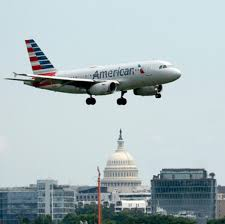

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [4]:


df = pd.read_csv('US Airline Flight Routes and Fares 1993-2024.csv')

# Print the first few rows of the dataframe to verify it loaded correctly
df.head()


/tmp/ipykernel_9223/1258182914.py:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('US Airline Flight Routes and Fares 1993-2024.csv')


,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


In [5]:

df = df.drop(['tbl', 'citymarketid_1', 'citymarketid_2', 'airportid_1', 'airportid_2', 'Geocoded_City1', 'Geocoded_City2', 'tbl1apk', 'city1', 'city2'], axis=1)


In [6]:
df.head()

,Year,quarter,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
0,2021,3,ABE,PIE,970,180,81.43,G4,1.0000,81.43,G4,1.0000,81.43
1,2021,3,ABE,TPA,970,19,208.93,DL,0.4659,219.98,UA,0.1193,154.11
2,2021,3,ABQ,DAL,580,204,184.56,WN,0.9968,184.44,WN,0.9968,184.44
3,2021,3,ABQ,DFW,580,264,182.64,AA,0.9774,183.09,AA,0.9774,183.09
4,2021,3,ABQ,PHX,328,398,177.11,WN,0.6061,184.49,AA,0.3939,165.77


In [7]:
# Check for missing values
print(df.isnull().sum())

Year              0
quarter           0
airport_1         0
airport_2         0
nsmiles           0
passengers        0
fare              0
carrier_lg     1540
large_ms       1540
fare_lg        1540
carrier_low    1612
lf_ms          1612
fare_low       1612
dtype: int64


In [8]:

for column in ['airport_1', 'airport_2', 'carrier_lg', 'carrier_low']:
  print(f"Unique values for {column}: {df[column].unique()}")


Unique values for airport_1: ['ABE' 'ABQ' 'ACK' 'COS' 'DAL' 'DFW' 'PIT' 'HSV' 'ALB' 'AMA' 'DEN' 'ATL'
 'AUS' 'AVL' 'TUS' 'AZA' 'PHX' 'BDL' 'SEA' 'BHM' 'ELP' 'CAK' 'CLE' 'BNA'
 'BOI' 'BOS' 'MHT' 'PVD' 'BTV' 'BUF' 'BZN' 'BWI' 'DCA' 'IAD' 'MDW' 'ORD'
 'CHS' 'CID' 'CLT' 'CMH' 'LCK' 'STL' 'MYR' 'JAX' 'DTW' 'DSM' 'HOU' 'IAH'
 'MCO' 'ECP' 'VPS' 'EUG' 'EYW' 'FAR' 'FCA' 'MSP' 'EWR' 'HPN' 'ISP' 'JFK'
 'LGA' 'SWF' 'RSW' 'GSP' 'GRR' 'GSO' 'LAS' 'IND' 'JAC' 'JAN' 'OAK' 'SFO'
 'SJC' 'FLL' 'MIA' 'BUR' 'LAX' 'LGB' 'ONT' 'SNA' 'LIT' 'SDF' 'CVG' 'SMF'
 'PIE' 'TPA' 'MCI' 'SAT' 'MEM' 'OMA' 'MKE' 'MSN' 'MSY' 'MVY' 'SAN' 'ORF'
 'PHF' 'PNS' 'OKC' 'PDX' 'PHL' 'PSP' 'PWM' 'RDM' 'RDU' 'RNO' 'ROC' 'SLC'
 'SAV' 'SGF' 'SRQ' 'SYR' 'TYS' 'BIS' 'CAE' 'FAT' 'XNA' 'RIC' 'ACY' 'ASE'
 'ATW' 'BGR' 'BIL' 'EGE' 'FNT' 'FWA' 'HRL' 'PAE' 'CHI' 'EFD' 'NYC' 'DTT'
 'DAY' 'VGT' 'BTR' 'TUL' 'TSS' 'CRP' 'DAB' 'SAC' 'DET' 'MLB' 'AIY' 'GEG'
 'LEX' 'BLI' 'CGX' 'GPT' 'TLH' 'FTW' 'BMI' 'MDT' 'MGM' 'ORL' 'FYV' 'MKC'
 'MFR' 'SBN' 'LAN' 'AG

In [9]:

for column in ['airport_1', 'airport_2', 'carrier_lg', 'carrier_low']:
  print(f"Number of unique values for {column}: {df[column].nunique()}")


Number of unique values for airport_1: 187
Number of unique values for airport_2: 173
Number of unique values for carrier_lg: 67
Number of unique values for carrier_low: 71


In [10]:

for column in ['airport_1', 'airport_2', 'carrier_lg', 'carrier_low']:
  print(f"\nFrequency of unique values for {column}:")
  print(df[column].value_counts())



Frequency of unique values for airport_1:
airport_1
ORD    8819
MDW    8656
BOS    8046
DFW    8016
PVD    7697
       ... 
BMI       1
BLV       1
STP       1
FYV       1
FNL       1
Name: count, Length: 187, dtype: int64

Frequency of unique values for airport_2:
airport_2
DCA    10268
BWI    10222
IAD    10053
TPA     7673
SFO     7413
       ...  
FWA        1
VGT        1
SFB        1
STC        1
CGX        1
Name: count, Length: 173, dtype: int64

Frequency of unique values for carrier_lg:
carrier_lg
WN    58999
AA    45828
DL    34088
UA    29820
US    25836
      ...  
T3        1
ZV        1
OH        1
KS        1
XJ        1
Name: count, Length: 67, dtype: int64

Frequency of unique values for carrier_low:
carrier_low
WN    56027
AA    36189
DL    29949
US    24811
UA    20847
      ...  
HA        1
OP        1
XJ        1
QX        1
A7        1
Name: count, Length: 71, dtype: int64


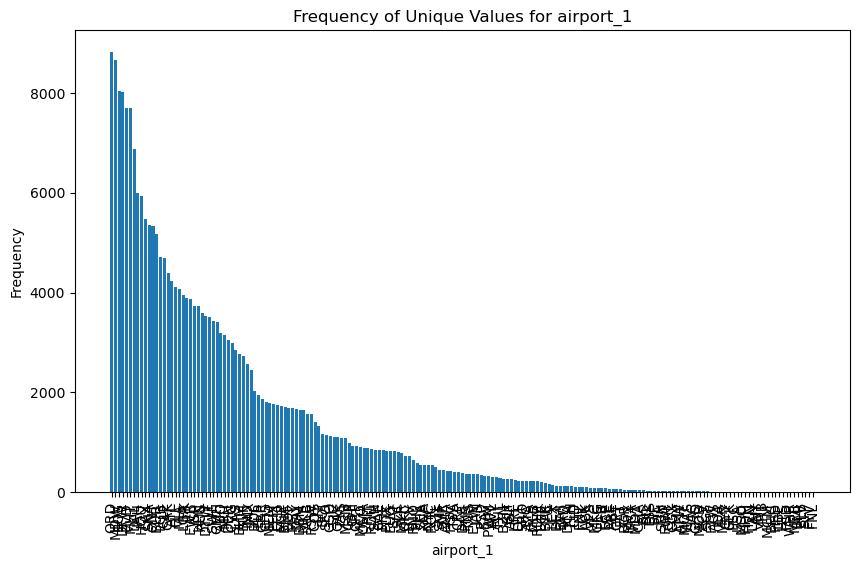

Removed 28 low-frequency values from airport_1


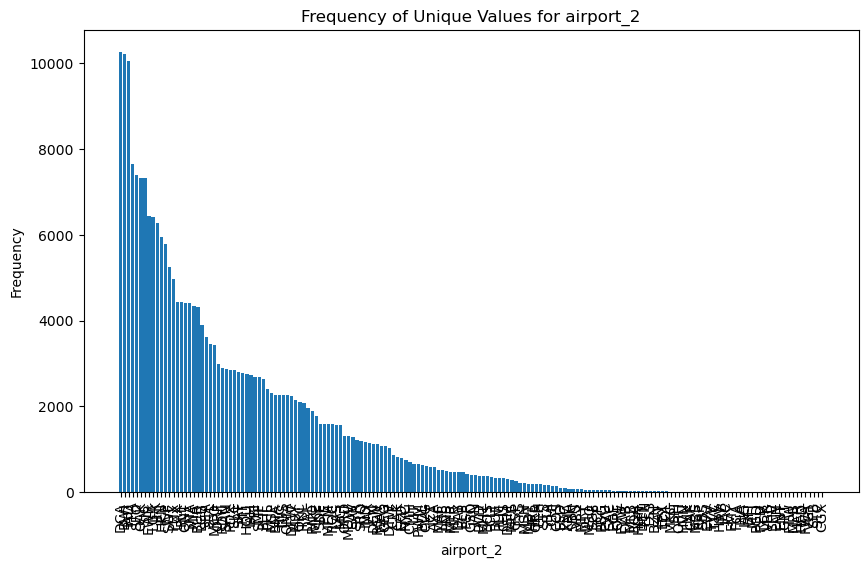

Removed 33 low-frequency values from airport_2


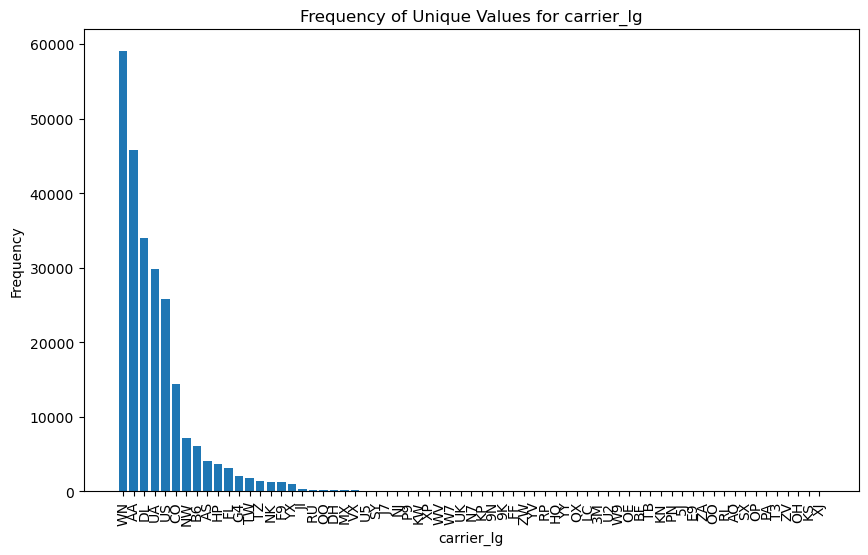

Removed 20 low-frequency values from carrier_lg


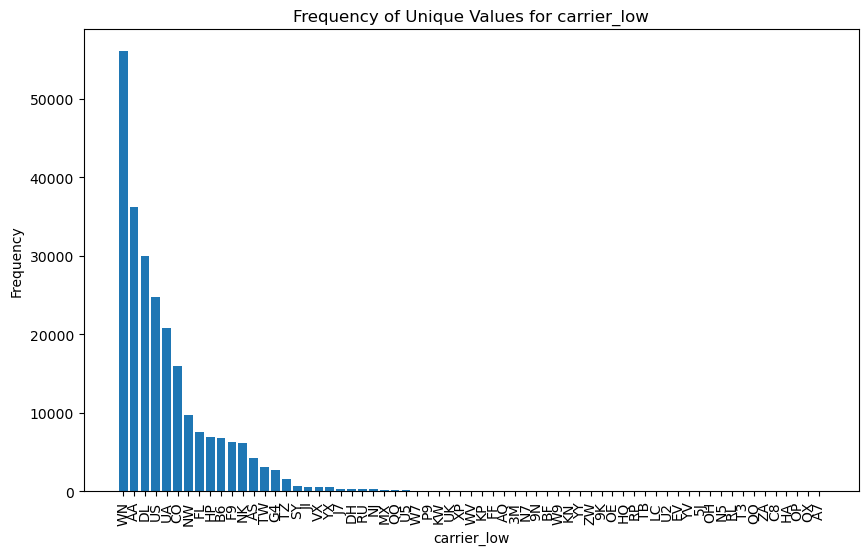

Removed 17 low-frequency values from carrier_low


In [11]:


import matplotlib.pyplot as plt

for column in ['airport_1', 'airport_2', 'carrier_lg', 'carrier_low']:
  value_counts = df[column].value_counts()

  plt.figure(figsize=(10, 6))
  plt.bar(value_counts.index, value_counts.values)
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title(f'Frequency of Unique Values for {column}')
  plt.xticks(rotation=90)
  plt.show()

  # Identify and remove low-frequency values (e.g., values with frequency < 10)
  low_frequency_values = value_counts[value_counts < 10].index.tolist()
  df = df[~df[column].isin(low_frequency_values)]

  print(f"Removed {len(low_frequency_values)} low-frequency values from {column}")



# **airport_1**

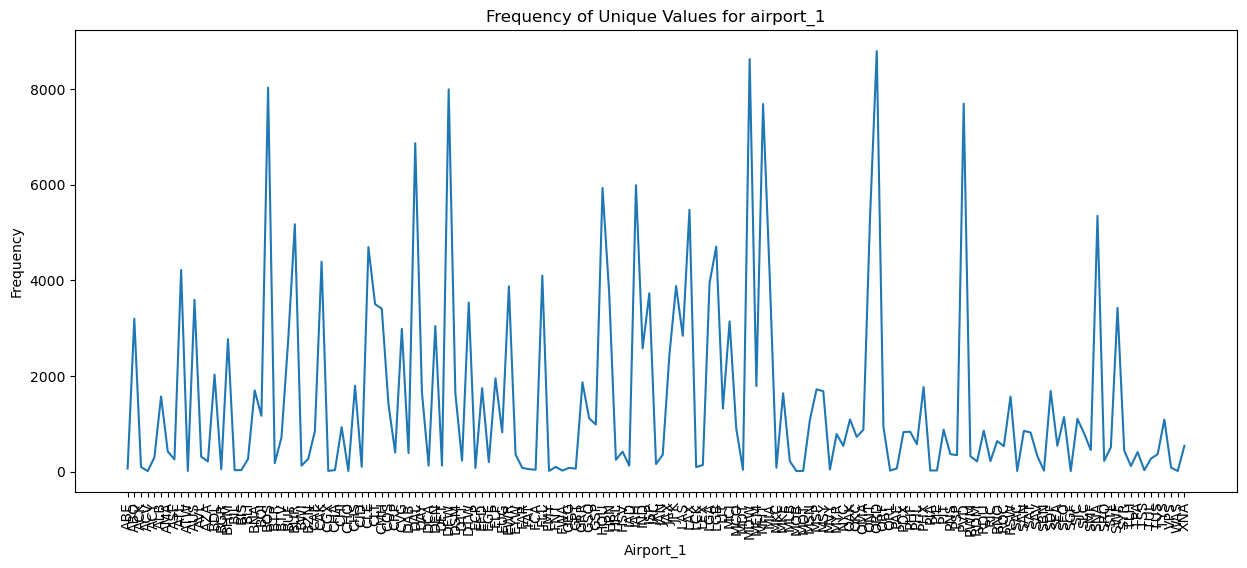

In [12]:


# Count the number of unique values for 'airport_1'
num_unique_airports = df['airport_1'].nunique()

# Create bins for the line chart
bins = 10  # You can adjust the number of bins as needed

# Create a line chart of all unique values of airport_1
plt.figure(figsize=(15, 6))
plt.plot(df['airport_1'].value_counts().sort_index())
plt.xlabel('Airport_1')
plt.ylabel('Frequency')
plt.title('Frequency of Unique Values for airport_1')
plt.xticks(rotation=90)
plt.show()


Unique values for airport_1: ['Others' 'ABQ' 'COS' 'DAL' 'DFW' 'PIT' 'ALB' 'DEN' 'ATL' 'AUS' 'PHX'
 'BDL' 'SEA' 'BHM' 'ELP' 'CAK' 'CLE' 'BNA' 'BOI' 'BOS' 'MHT' 'PVD' 'BTV'
 'BUF' 'MDW' 'ORD' 'CHS' 'CLT' 'CMH' 'STL' 'MYR' 'JAX' 'DTW' 'DSM' 'HOU'
 'IAH' 'MCO' 'EUG' 'MSP' 'EWR' 'HPN' 'ISP' 'JFK' 'LGA' 'SWF' 'RSW' 'GSP'
 'GRR' 'GSO' 'LAS' 'IND' 'OAK' 'SFO' 'SJC' 'FLL' 'MIA' 'BUR' 'LAX' 'LGB'
 'ONT' 'SNA' 'LIT' 'SDF' 'CVG' 'MCI' 'SAT' 'MEM' 'OMA' 'MKE' 'MSN' 'MSY'
 'SAN' 'ORF' 'PHF' 'OKC' 'PDX' 'PHL' 'RDU' 'RNO' 'ROC' 'SLC' 'TYS' 'CAE'
 'XNA' 'CHI' 'EFD' 'NYC' 'DAY']
Number of unique values for airport_1: 88


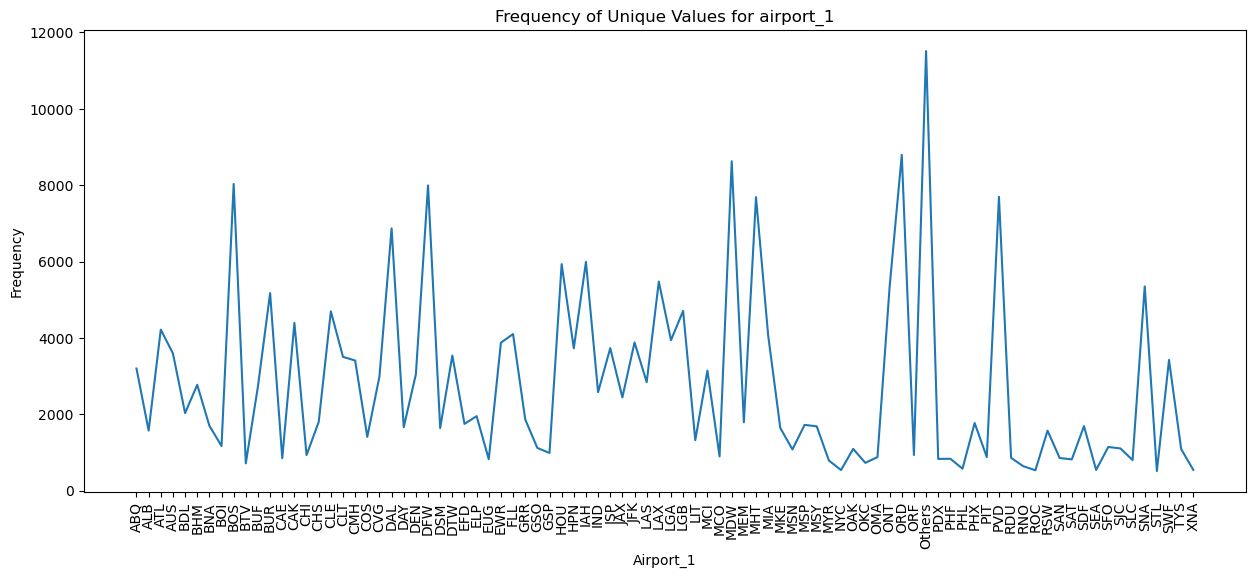

In [13]:

# Group by 'airport_1' and count the occurrences
airport_counts = df.groupby('airport_1')['airport_1'].count()

# Identify airports with counts less than 500
low_frequency_airports = airport_counts[airport_counts < 500].index.tolist()

# Replace low-frequency airports with 'Others' in the 'airport_1' column
df['airport_1'] = df['airport_1'].apply(lambda x: 'Others' if x in low_frequency_airports else x)

# Count the number of unique values for 'airport_1'
num_unique_airports = df['airport_1'].nunique()

# Print the unique values for 'airport_1'
print(f"Unique values for airport_1: {df['airport_1'].unique()}")

# Print the number of unique values for 'airport_1'
print(f"Number of unique values for airport_1: {num_unique_airports}")

# Create a line chart of all unique values of airport_1
plt.figure(figsize=(15, 6))
plt.plot(df['airport_1'].value_counts().sort_index())
plt.xlabel('Airport_1')
plt.ylabel('Frequency')
plt.title('Frequency of Unique Values for airport_1')
plt.xticks(rotation=90)
plt.show()


# ***airport_2***

Number of unique values for airport_2: 140


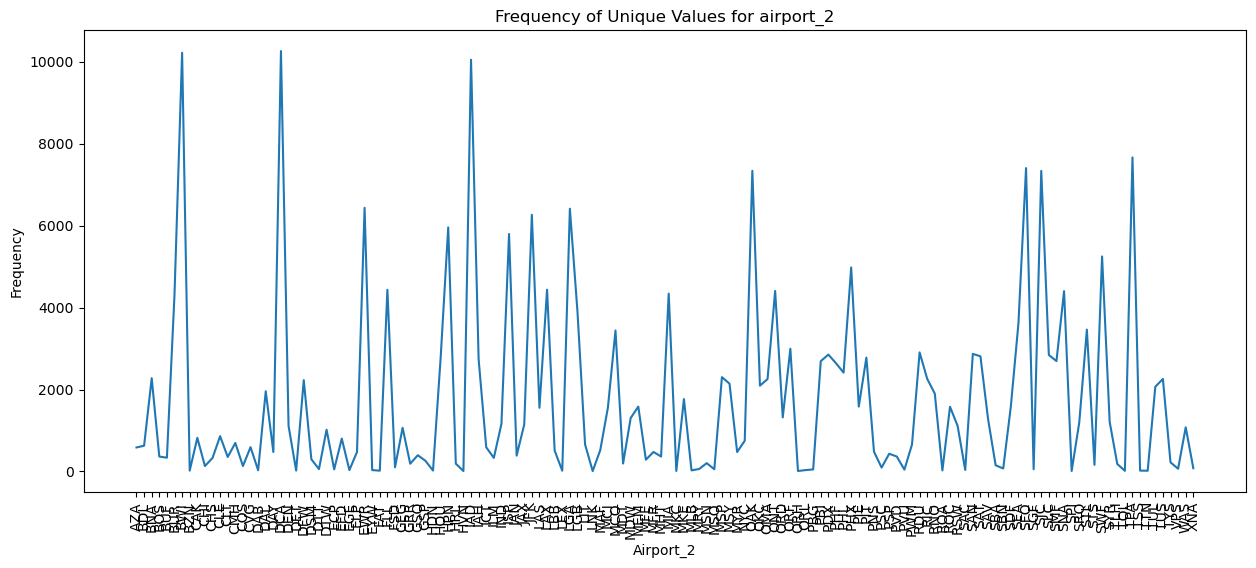

In [14]:

# Count the number of unique values for 'airport_2'
num_unique_airports_2 = df['airport_2'].nunique()

# Print the number of unique values for 'airport_2'
print(f"Number of unique values for airport_2: {num_unique_airports_2}")

# Create a line chart of all unique values of airport_2
plt.figure(figsize=(15, 6))
plt.plot(df['airport_2'].value_counts().sort_index())
plt.xlabel('Airport_2')
plt.ylabel('Frequency')
plt.title('Frequency of Unique Values for airport_2')
plt.xticks(rotation=90)
plt.show()


Unique values for airport_2: ['PIE' 'TPA' 'DAL' 'DFW' 'PHX' 'Others' 'BWI' 'DCA' 'IAD' 'MDW' 'ORD'
 'HOU' 'IAH' 'EWR' 'HPN' 'ISP' 'JFK' 'LGA' 'SWF' 'OAK' 'SFO' 'SJC' 'BUR'
 'LAX' 'LGB' 'ONT' 'SNA' 'PIT' 'DEN' 'TUS' 'BDL' 'SEA' 'BNA' 'STL' 'JAX'
 'DTW' 'MCO' 'MSP' 'RSW' 'GEG' 'LAS' 'IND' 'FLL' 'MIA' 'LIT' 'LBB' 'SDF'
 'MAF' 'SMF' 'MCI' 'SAT' 'MEM' 'OMA' 'MKE' 'MSY' 'SAN' 'ORF' 'PHF' 'PBI'
 'PDX' 'PHL' 'RDU' 'RIC' 'RNO' 'SLC' 'TUL' 'SAV' 'CAK' 'CLE' 'CMH' 'SRQ'
 'AZA' 'CVG' 'OKC' 'PWM' 'SYR' 'ROC' 'ICT' 'EFD' 'WAS' 'NYC']
Number of unique values for airport_2: 81


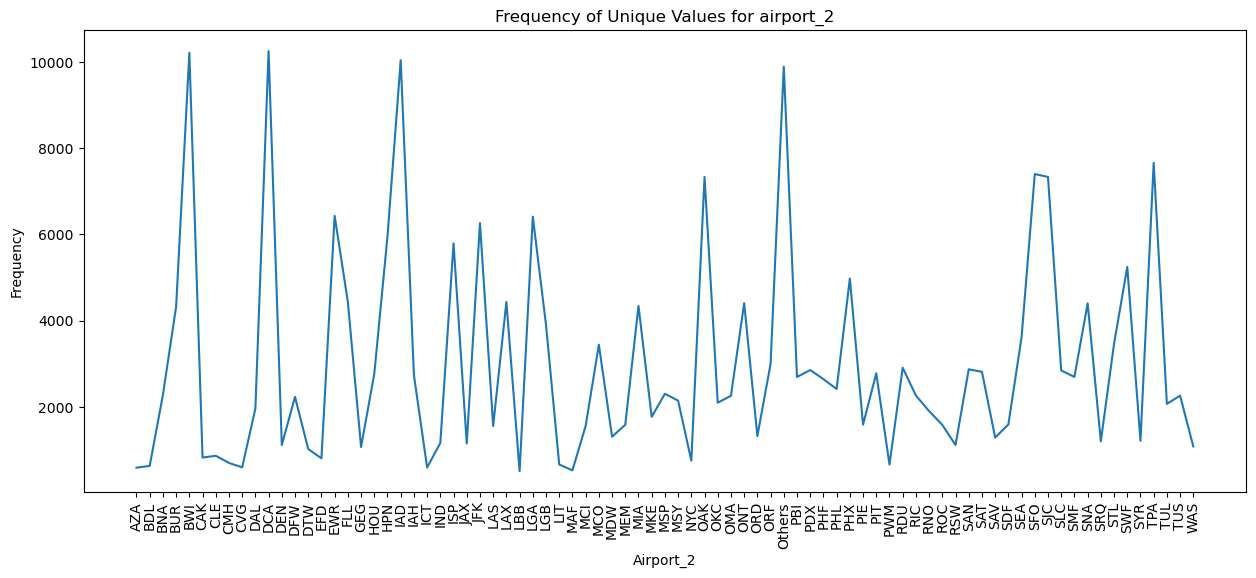

In [15]:

# Group by 'airport_2' and count the occurrences
airport_counts_2 = df.groupby('airport_2')['airport_2'].count()

# Identify airports with counts less than 500
low_frequency_airports_2 = airport_counts_2[airport_counts_2 < 500].index.tolist()

# Replace low-frequency airports with 'Others' in the 'airport_2' column
df['airport_2'] = df['airport_2'].apply(lambda x: 'Others' if x in low_frequency_airports_2 else x)

# Count the number of unique values for 'airport_2'
num_unique_airports_2 = df['airport_2'].nunique()

# Print the unique values for 'airport_2'
print(f"Unique values for airport_2: {df['airport_2'].unique()}")

# Print the number of unique values for 'airport_2'
print(f"Number of unique values for airport_2: {num_unique_airports_2}")

# Create a line chart of all unique values of airport_2
plt.figure(figsize=(15, 6))
plt.plot(df['airport_2'].value_counts().sort_index())
plt.xlabel('Airport_2')
plt.ylabel('Frequency')
plt.title('Frequency of Unique Values for airport_2')
plt.xticks(rotation=90)
plt.show()


# **carrier_lg**

Number of unique values for carrier_lg: 47


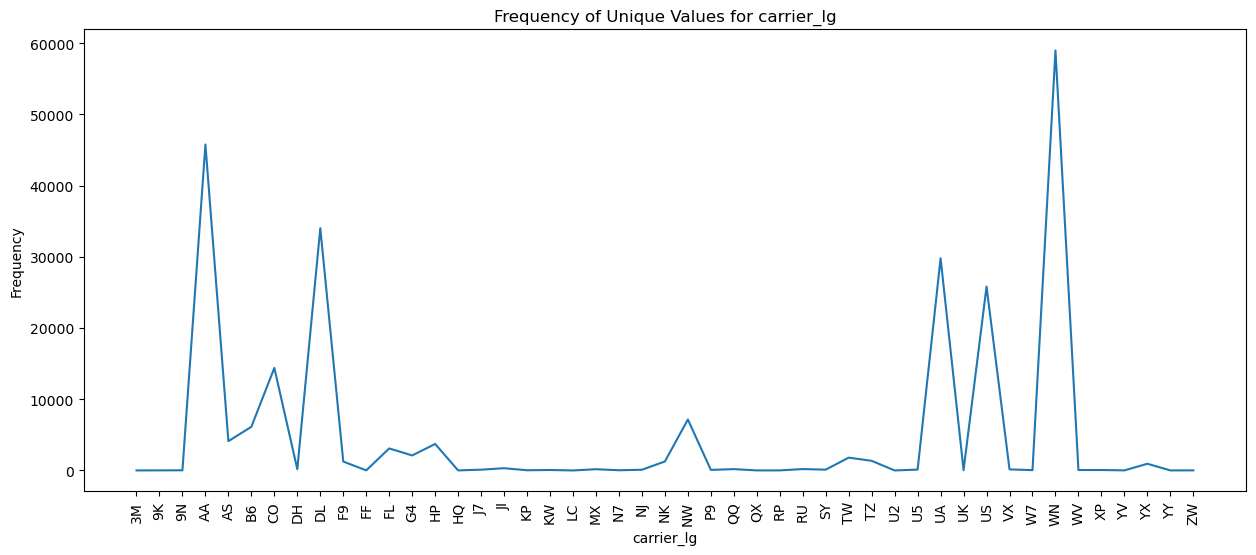

Carriers with low values (frequency < 150): ['3M', '9K', '9N', 'FF', 'HQ', 'J7', 'KP', 'KW', 'LC', 'N7', 'NJ', 'P9', 'QX', 'RP', 'SY', 'U2', 'U5', 'UK', 'W7', 'WV', 'XP', 'YV', 'YY', 'ZW']


In [16]:

# Count the number of unique values for 'carrier_lg'
num_unique_carrier_lg = df['carrier_lg'].nunique()

# Print the number of unique values for 'carrier_lg'
print(f"Number of unique values for carrier_lg: {num_unique_carrier_lg}")

# Create a line chart of all unique values of carrier_lg
plt.figure(figsize=(15, 6))
plt.plot(df['carrier_lg'].value_counts().sort_index())
plt.xlabel('carrier_lg')
plt.ylabel('Frequency')
plt.title('Frequency of Unique Values for carrier_lg')
plt.xticks(rotation=90)
plt.show()

# Group by 'carrier_lg' and count the occurrences
carrier_lg_counts = df.groupby('carrier_lg')['carrier_lg'].count()

# Identify carriers with counts less than 150
low_frequency_carriers_lg = carrier_lg_counts[carrier_lg_counts < 150].index.tolist()

print(f"Carriers with low values (frequency < 150): {low_frequency_carriers_lg}")


Unique values for carrier_lg: ['G4' 'DL' 'WN' 'AA' 'UA' 'B6' 'AS' 'F9' 'NK' 'Others' 'MX' nan 'US' 'HP'
 'CO' 'YX' 'FL' 'NW' 'TW' 'RU' 'DH' 'TZ' 'JI' 'QQ' 'VX']
Number of unique values for carrier_lg: 24


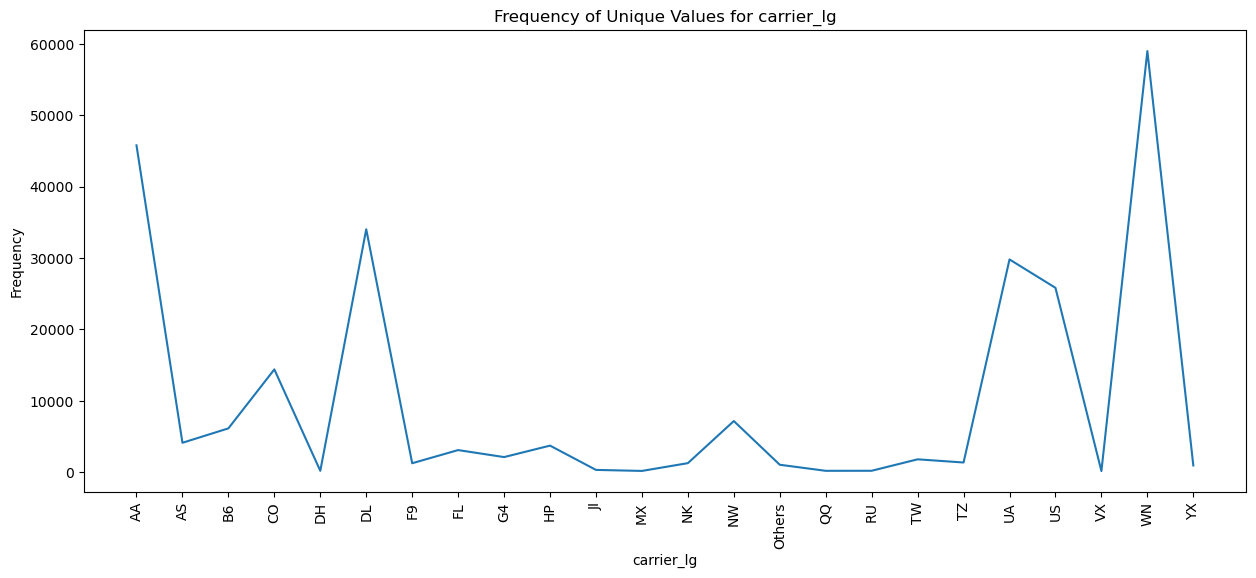

In [17]:


# Replace low-frequency carriers with 'Others' in the 'carrier_lg' column
df['carrier_lg'] = df['carrier_lg'].apply(lambda x: 'Others' if x in low_frequency_carriers_lg else x)

# Count the number of unique values for 'carrier_lg'
num_unique_carrier_lg = df['carrier_lg'].nunique()

# Print the unique values for 'carrier_lg'
print(f"Unique values for carrier_lg: {df['carrier_lg'].unique()}")

# Print the number of unique values for 'carrier_lg'
print(f"Number of unique values for carrier_lg: {num_unique_carrier_lg}")

# Create a line chart of all unique values of carrier_lg
plt.figure(figsize=(15, 6))
plt.plot(df['carrier_lg'].value_counts().sort_index())
plt.xlabel('carrier_lg')
plt.ylabel('Frequency')
plt.title('Frequency of Unique Values for carrier_lg')
plt.xticks(rotation=90)
plt.show()


# **carrier_low**

Number of unique values for carrier_low: 48


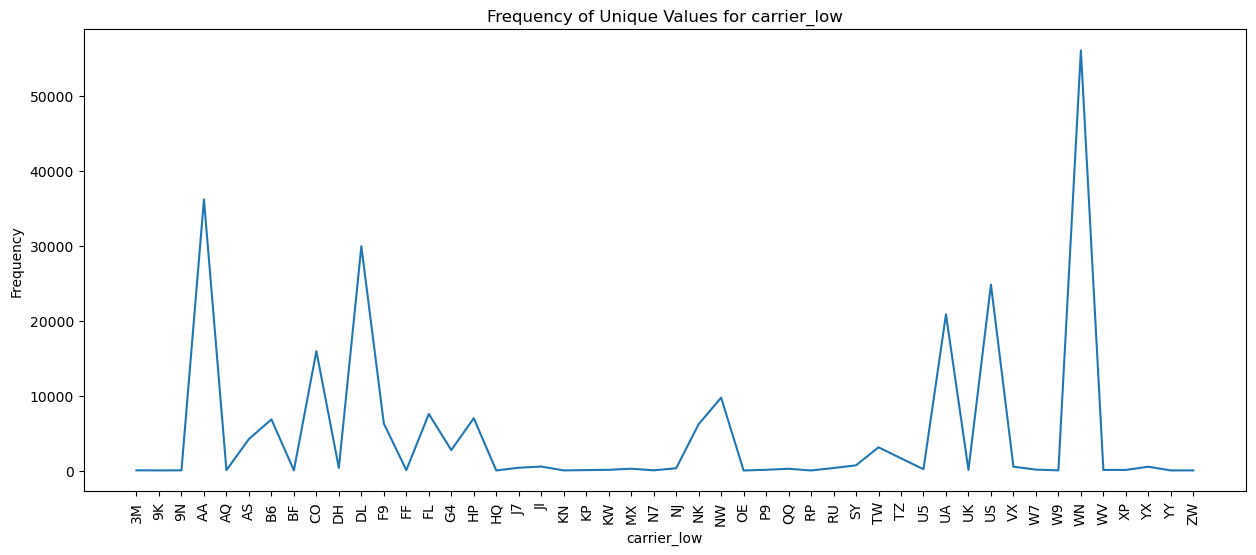

Carriers with low values (frequency < 150): ['3M', '9K', '9N', 'AQ', 'BF', 'FF', 'HQ', 'KN', 'KP', 'KW', 'N7', 'OE', 'P9', 'RP', 'UK', 'W7', 'W9', 'WV', 'XP', 'YY', 'ZW']


In [18]:

# Count the number of unique values for 'carrier_low'
num_unique_carrier_low = df['carrier_low'].nunique()

# Print the number of unique values for 'carrier_low'
print(f"Number of unique values for carrier_low: {num_unique_carrier_low}")

# Create a line chart of all unique values of carrier_low
plt.figure(figsize=(15, 6))
plt.plot(df['carrier_low'].value_counts().sort_index())
plt.xlabel('carrier_low')
plt.ylabel('Frequency')
plt.title('Frequency of Unique Values for carrier_low')
plt.xticks(rotation=90)
plt.show()

# Group by 'carrier_low' and count the occurrences
carrier_low_counts = df.groupby('carrier_low')['carrier_low'].count()

# Identify carriers with counts less than 150
low_frequency_carriers_low = carrier_low_counts[carrier_low_counts < 150].index.tolist()

print(f"Carriers with low values (frequency < 150): {low_frequency_carriers_low}")


Carriers with low values (frequency < 100): ['3M', '9K', '9N', 'AQ', 'BF', 'FF', 'HQ', 'KN', 'KP', 'KW', 'N7', 'OE', 'P9', 'RP', 'UK', 'W9', 'WV', 'XP', 'YY', 'ZW']
Unique values for carrier_low: ['G4' 'UA' 'WN' 'AA' 'B6' 'DL' 'F9' 'NK' 'AS' 'SY' 'Others' 'MX' nan 'US'
 'NW' 'CO' 'HP' 'FL' 'YX' 'NJ' 'TW' 'RU' 'DH' 'J7' 'JI' 'TZ' 'U5' 'VX'
 'QQ' 'W7']
Number of unique values for carrier_low: 29


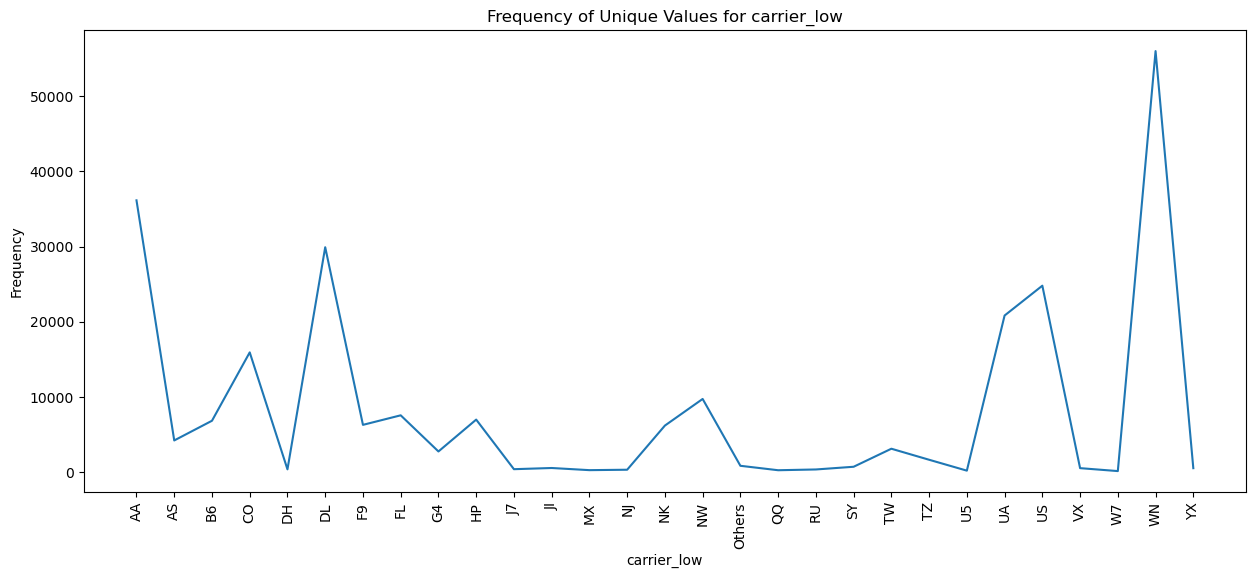

In [19]:

# Group by 'carrier_low' and count the occurrences
carrier_low_counts = df.groupby('carrier_low')['carrier_low'].count()

# Identify carriers with counts less than 100
low_frequency_carriers_low = carrier_low_counts[carrier_low_counts < 100].index.tolist()

print(f"Carriers with low values (frequency < 100): {low_frequency_carriers_low}")

# Replace low-frequency carriers with 'Others' in the 'carrier_low' column
df['carrier_low'] = df['carrier_low'].apply(lambda x: 'Others' if x in low_frequency_carriers_low else x)

# Count the number of unique values for 'carrier_low'
num_unique_carrier_low = df['carrier_low'].nunique()

# Print the unique values for 'carrier_low'
print(f"Unique values for carrier_low: {df['carrier_low'].unique()}")

# Print the number of unique values for 'carrier_low'
print(f"Number of unique values for carrier_low: {num_unique_carrier_low}")

# Create a line chart of all unique values of carrier_low
plt.figure(figsize=(15, 6))
plt.plot(df['carrier_low'].value_counts().sort_index())
plt.xlabel('carrier_low')
plt.ylabel('Frequency')
plt.title('Frequency of Unique Values for carrier_low')
plt.xticks(rotation=90)
plt.show()


In [20]:

for column in df.columns:
  print(f"Number of unique values for {column}: {df[column].nunique()}")


Number of unique values for Year: 31
Number of unique values for quarter: 4
Number of unique values for airport_1: 88
Number of unique values for airport_2: 81
Number of unique values for nsmiles: 1135
Number of unique values for passengers: 3875
Number of unique values for fare: 36306
Number of unique values for carrier_lg: 24
Number of unique values for large_ms: 7367
Number of unique values for fare_lg: 37493
Number of unique values for carrier_low: 29
Number of unique values for lf_ms: 9687
Number of unique values for fare_low: 32270


In [21]:
# prompt: chack the misssing values

# Check for missing values
print(df.isnull().sum())


Year              0
quarter           0
airport_1         0
airport_2         0
nsmiles           0
passengers        0
fare              0
carrier_lg     1517
large_ms       1517
fare_lg        1517
carrier_low    1589
lf_ms          1589
fare_low       1589
dtype: int64


In [22]:

df.dropna(inplace=True)


# **code**

In [23]:
print(df.isnull().sum())

Year           0
quarter        0
airport_1      0
airport_2      0
nsmiles        0
passengers     0
fare           0
carrier_lg     0
large_ms       0
fare_lg        0
carrier_low    0
lf_ms          0
fare_low       0
dtype: int64


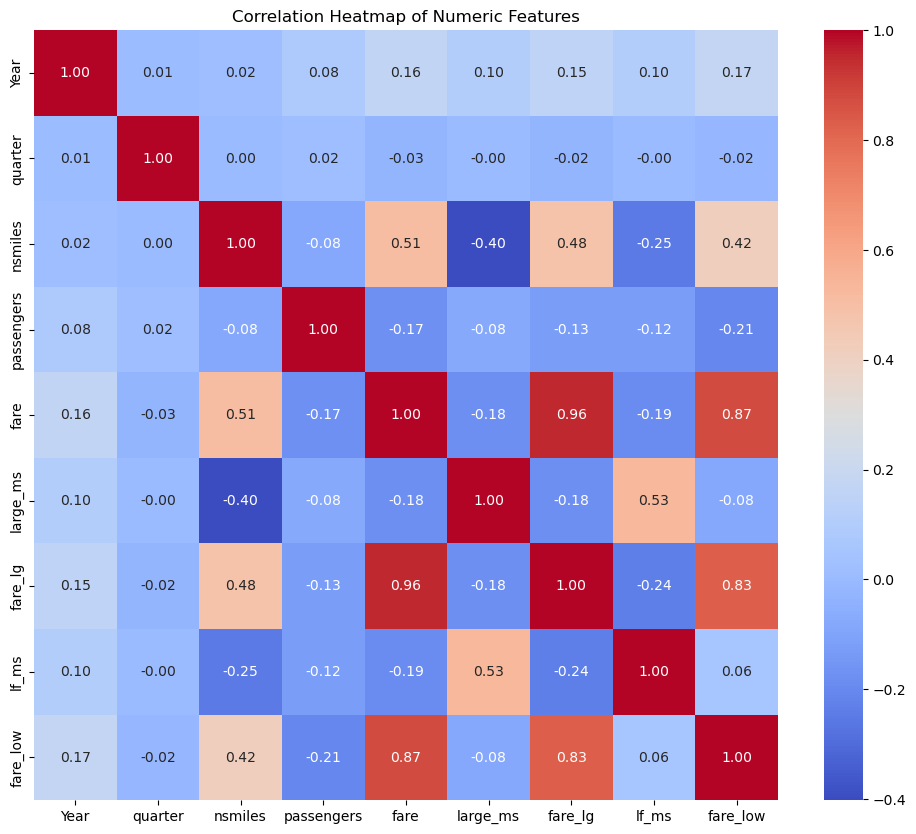

In [24]:

# Select only numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


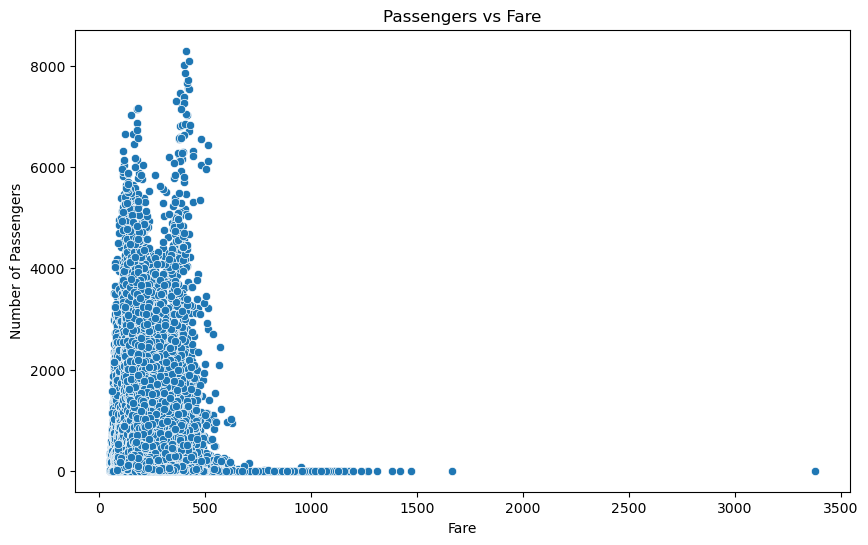

In [25]:

# 3. Passengers vs Fare scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fare', y='passengers', data=df)
plt.title('Passengers vs Fare')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.show()

In [26]:
# Define preprocessing steps
numeric_features = ['Year', 'quarter', 'nsmiles', 'fare', 'large_ms', 'fare_lg', 'lf_ms', 'fare_low']
categorical_features = ['airport_1', 'airport_2', 'carrier_lg', 'carrier_low']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [27]:
# Prepare features for modeling
X = df.drop('fare', axis=1)
y = df['fare']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [28]:
X

,Year,quarter,airport_1,airport_2,nsmiles,passengers,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
0,2021,3,Others,PIE,970,180,G4,1.0000,81.43,G4,1.0000,81.43
1,2021,3,Others,TPA,970,19,DL,0.4659,219.98,UA,0.1193,154.11
2,2021,3,ABQ,DAL,580,204,WN,0.9968,184.44,WN,0.9968,184.44
3,2021,3,ABQ,DFW,580,264,AA,0.9774,183.09,AA,0.9774,183.09
4,2021,3,ABQ,PHX,328,398,WN,0.6061,184.49,AA,0.3939,165.77
...,...,...,...,...,...,...,...,...,...,...,...,...
245950,2024,1,TYS,LGA,665,207,DL,0.7503,287.44,AA,0.2359,248.46
245951,2024,1,TYS,FLL,724,277,G4,0.8255,114.45,G4,0.8255,114.45
245952,2024,1,TYS,MIA,724,70,AA,0.8057,321.92,AA,0.8057,321.92
245953,2024,1,TYS,PIE,550,178,G4,1.0000,95.65,G4,1.0000,95.65


In [29]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
model = LinearRegression()

# Convert categorical features to numerical using one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features)

# Align the training and testing sets to ensure they have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1)
X_test_encoded = X_test_encoded.fillna(0)


# Fit the model to the training data
model.fit(X_train_encoded, y_train)


# Make predictions on the test data
y_pred = model.predict(X_test_encoded)


# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"Accuracy Score : {r2}")


# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


# Calculate accuracy (you might need to adapt this based on your specific problem)
# For regression, it's not standard to use accuracy, you can use a different metric
# like R-squared or mean squared error instead.



Accuracy Score : 0.9471825093952633
Mean Squared Error: 330.0708619302584


In [30]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
model = LinearRegression()

# Convert categorical features to numerical using one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features)

# Align the training and testing sets to ensure they have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1)
X_test_encoded = X_test_encoded.fillna(0)


# Fit the model to the training data
model.fit(X_train_encoded, y_train)


# Make predictions on the test data
y_pred = model.predict(X_test_encoded)


# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"Accuracy Score: {r2 * 100:.0f}%")



Accuracy Score: 95%


In [31]:

# Save the model to the specified folder in your Google Drive
joblib.dump(model, 'model.pkl')


['model.pkl']

In [32]:
X_test.tail()

,Year,quarter,airport_1,airport_2,nsmiles,passengers,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
153095,2012,4,CAK,OAK,2187,3,WN,0.9000,313.51,DL,0.0300,249.40
16311,1996,2,BOS,SAN,2588,452,AA,0.2900,292.36,AA,0.2900,292.36
71027,2012,4,ATL,SNA,1947,381,DL,0.6900,321.32,F9,0.0200,184.68
10560,2000,2,DFW,LGB,1246,537,AA,0.9400,211.23,AA,0.9400,211.23
204068,2017,4,ATL,PHX,1587,1318,DL,0.5013,261.04,WN,0.2359,205.61


In [33]:

# Get the last row of X_test
last_row = X_test.iloc[-1]

# Convert categorical features to numerical using one-hot encoding
last_row_encoded = pd.get_dummies(pd.DataFrame([last_row]), columns=categorical_features)

# Align the encoded row with the training set columns
last_row_encoded = last_row_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


# Make prediction for the last row
y_pred_last_row = model.predict(last_row_encoded)

print(f"Predicted fare for the last row: {y_pred_last_row[0]}")


Predicted fare for the last row: 245.37612935900688


In [34]:

print(y_test.head())


212417    294.63
35770     153.87
95824     227.60
195251    259.05
87054     199.18
Name: fare, dtype: float64


In [35]:

# Create a DataFrame with the provided values
new_data = pd.DataFrame({
    'Year': [2018],
    'quarter': [4],
    'airport_1': ['TYS'],
    'airport_2': ['TPA'],
    'nsmiles': [550],
    'passengers': [51],
    'carrier_lg': ['DL'],
    'large_ms': [0.5191],
    'fare_lg': [306.88],
    'carrier_low': ['AA'],
    'lf_ms': [0.4468],
    'fare_low': [280.42]
})

# Convert categorical features to numerical using one-hot encoding
new_data_encoded = pd.get_dummies(new_data, columns=categorical_features)

# Align the new data with the training data columns
new_data_encoded = new_data_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Make a prediction using the trained model
prediction = model.predict(new_data_encoded)

print(f"Predicted fare for the new data: {prediction[0]}")


Predicted fare for the new data: 294.6690121591091


In [36]:
y_test.head()

212417    294.63
35770     153.87
95824     227.60
195251    259.05
87054     199.18
Name: fare, dtype: float64

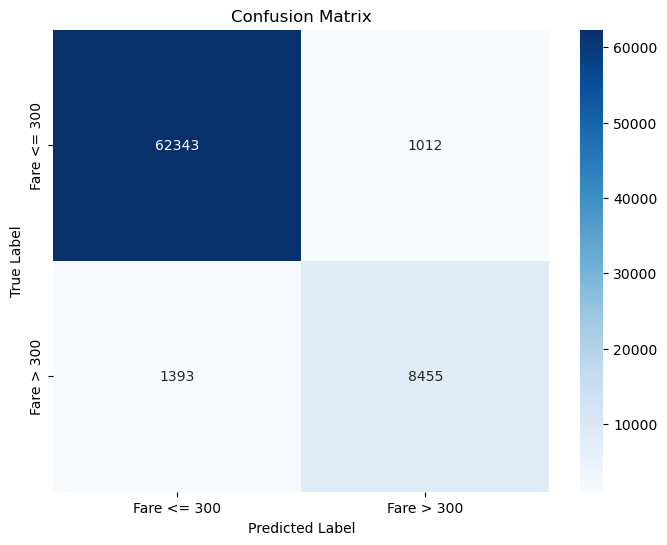

In [37]:
# prompt: make Confusion Matrix of above

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are your true and predicted labels respectively
# For regression models like Linear Regression, a confusion matrix is not directly applicable
# as the output is continuous and not discrete classes. 
# However, if you want to create a confusion matrix for regression by creating 
# categories based on your prediction threshold, you can proceed with the following 
# steps.

# Example: Create categories for fares above and below a certain threshold (e.g., 300)

threshold = 300
y_test_cat = [1 if fare > threshold else 0 for fare in y_test]
y_pred_cat = [1 if fare > threshold else 0 for fare in y_pred]


cm = confusion_matrix(y_test_cat, y_pred_cat)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fare <= 300', 'Fare > 300'],
            yticklabels=['Fare <= 300', 'Fare > 300'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [38]:

from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true and predicted labels
# You might need to adjust the threshold for classification if necessary
y_pred_classes = (y_pred > 0.5).astype(int)  # Example threshold for binary classification
y_test_classes = (y_test > 0.5).astype(int)  # Example threshold for binary classification


# Create the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[73203]]


/home/rizwan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [39]:

from sklearn.metrics import classification_report

# Assuming you have y_test_classes and y_pred_classes from the previous code

# Calculate the classification report
report = classification_report(y_test_classes, y_pred_classes)

# Print the report
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     73203

    accuracy                           1.00     73203
   macro avg       1.00      1.00      1.00     73203
weighted avg       1.00      1.00      1.00     73203



## Confusion Matrix (Training Data)
[[89469  4490]
 [ 4114 72731]]


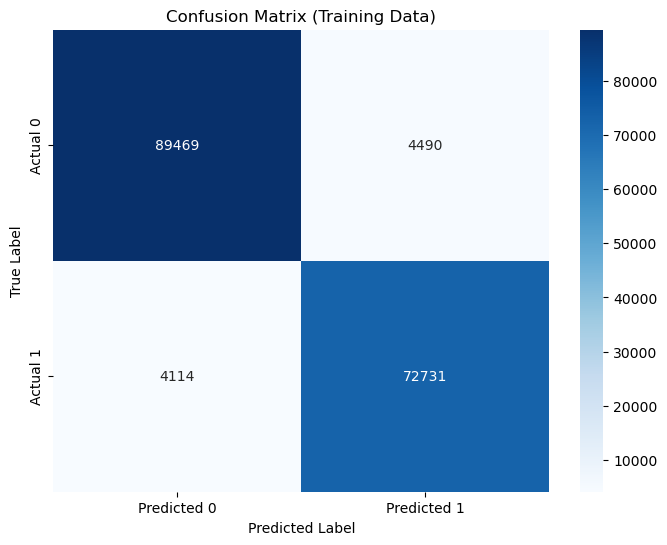

## Classification Report (Training Data)
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     93959
           1       0.94      0.95      0.94     76845

    accuracy                           0.95    170804
   macro avg       0.95      0.95      0.95    170804
weighted avg       0.95      0.95      0.95    170804


## Confusion Matrix (Testing Data)
[[38232  1945]
 [ 1841 31185]]


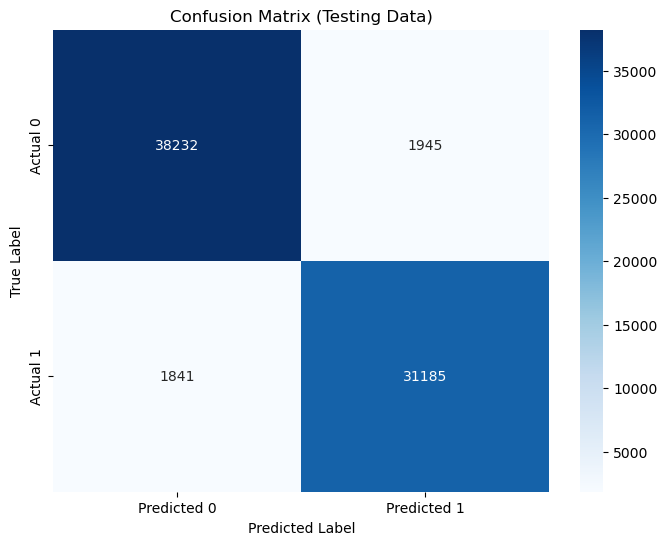


## Classification Report (Testing Data)
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     40177
           1       0.94      0.94      0.94     33026

    accuracy                           0.95     73203
   macro avg       0.95      0.95      0.95     73203
weighted avg       0.95      0.95      0.95     73203



In [40]:
# prompt: make Confusion Matrixand  Classification Report  for seperate train and test data

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have y_train, y_pred_train, y_test, y_pred_test from your model

# Convert regression predictions to classes for confusion matrix
# You'll need to define a threshold to determine positive/negative classes
threshold = y_train.mean()  # Using mean of training data as a threshold

y_pred_train_classes = [1 if pred > threshold else 0 for pred in model.predict(X_train_encoded)]
y_train_classes = [1 if true > threshold else 0 for true in y_train]

y_pred_test_classes = [1 if pred > threshold else 0 for pred in y_pred]
y_test_classes = [1 if true > threshold else 0 for true in y_test]


# Training Data
print("## Confusion Matrix (Training Data)")
cm_train = confusion_matrix(y_train_classes, y_pred_train_classes)
print(cm_train)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Training Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("## Classification Report (Training Data)")
print(classification_report(y_train_classes, y_pred_train_classes))



# Testing Data
print("\n## Confusion Matrix (Testing Data)")
cm_test = confusion_matrix(y_test_classes, y_pred_test_classes)
print(cm_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Testing Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\n## Classification Report (Testing Data)")
print(classification_report(y_test_classes, y_pred_test_classes))


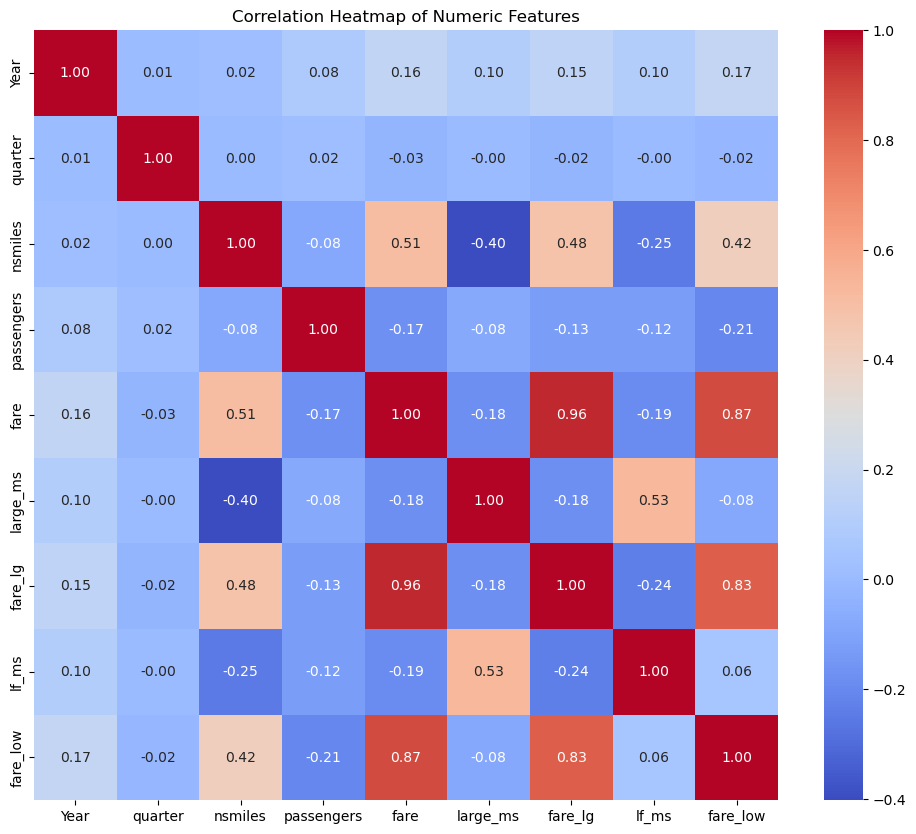

In [41]:
numeric_cols = df.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [42]:

# import cv2
# # from google.colab.patches import cv2_imshow

# # Load the image
# image = cv2.imread('hp.png')

# # Check if the image was loaded successfully
# if image is not None:
#   # Display the image
#   cv2.imshow('PPS Heatmap ' , image)
#   cv2.waitKey(0)
#   cv2.destroyAllWindows()

In [43]:
# prompt: creat two piplines for this project 1 is The first pipeline is responsible for data cleaning and feature engineering.
#  ans 2 is The second pipeline is responsible for feature scaling and modelling. print the piplines

from sklearn.pipeline import Pipeline

# Pipeline 1: Data Cleaning and Feature Engineering
cleaning_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    # Add other feature engineering steps here if needed (e.g., creating new features)
])


# Pipeline 2: Feature Scaling and Modeling
modeling_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale numerical features
    ('model', LinearRegression())  # Your chosen model
])

print("Cleaning Pipeline:")
print(cleaning_pipeline)

print("\nModeling Pipeline:")
print(modeling_pipeline)


Cleaning Pipeline:
Pipeline(steps=[('imputer', SimpleImputer())])

Modeling Pipeline:
Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])


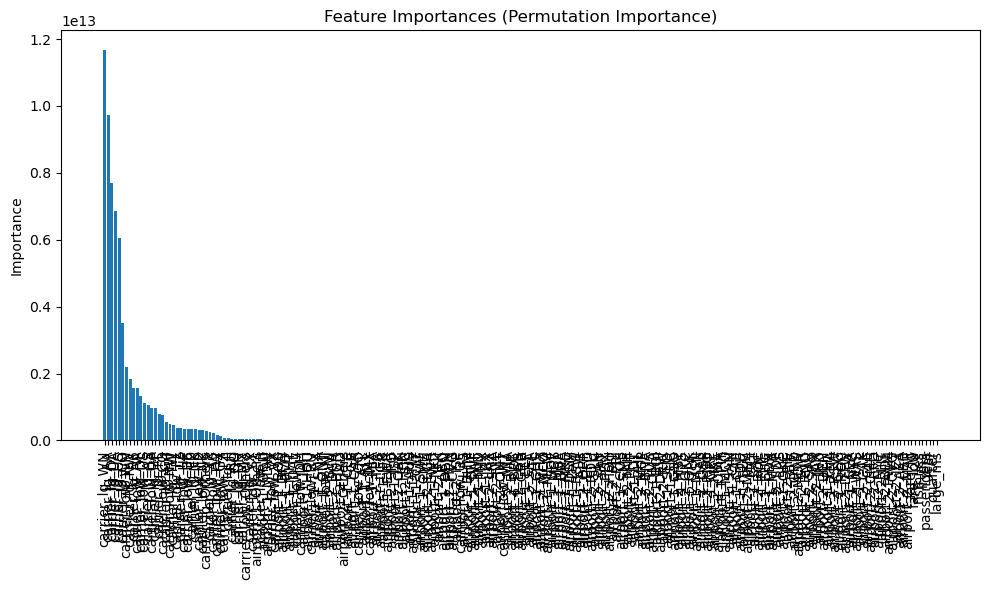

carrier_lg_WN: 11675785903770.316
carrier_lg_AA: 9723292356931.96
carrier_lg_DL: 7691066309458.953
carrier_lg_UA: 6869892442101.824
carrier_lg_US: 6047933675046.343
carrier_lg_CO: 3517837449130.9785
carrier_low_WN: 2185750703003.224
carrier_lg_NW: 1825960599725.5684
carrier_lg_B6: 1575698401972.728
carrier_low_AA: 1563460799069.7747
carrier_low_DL: 1331737550290.6934
carrier_low_US: 1126304856543.1763
carrier_lg_AS: 1060670467429.6296
carrier_low_UA: 967606161149.6566
carrier_lg_HP: 959332078573.8118
carrier_lg_FL: 801623912252.6686
carrier_low_CO: 750645553402.7601
carrier_lg_G4: 554613887327.5109
carrier_low_NW: 475546103563.13885
carrier_lg_TW: 470470447074.43933
carrier_low_FL: 367518106033.66046
carrier_lg_TZ: 356385295410.11926
carrier_low_HP: 341437394056.1034
carrier_low_B6: 337001354961.81116
carrier_lg_F9: 328985424668.2292
carrier_lg_NK: 327041640580.4126
carrier_low_F9: 310073926137.3377
carrier_low_NK: 303850449853.2713
carrier_lg_Others: 271980214554.98462
carrier_lg_YX: 

In [48]:
# prompt: important rank of  columns used for training in Year	quarter	airport_1	airport_2	nsmiles	passengers	carrier_lg and make bar graph

from sklearn.inspection import permutation_importance

# Assuming X_train_encoded and y_train are your training data
# Fit the model (you might have already done this)
model.fit(X_train_encoded, y_train)

# Calculate permutation importance
result = permutation_importance(model, X_train_encoded, y_train, n_repeats=10, random_state=42)

# Get importances and sort them
importances = result.importances_mean
sorted_idx = importances.argsort()[::-1]

# Create a bar graph of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_encoded.shape[1]), importances[sorted_idx], align="center")
plt.xticks(range(X_train_encoded.shape[1]), X_train_encoded.columns[sorted_idx], rotation=90)
plt.title("Feature Importances (Permutation Importance)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Print the feature importances with rank
for i in sorted_idx:
  print(f"{X_train_encoded.columns[i]}: {importances[i]}")


In [2]:

import pandas as pd
import numpy as np 
import feature_engine as f 
print(np.__version__)
print(f.__version__)

ModuleNotFoundError: No module named 'feature_engine'